In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
loan_data_inputs_test=pd.read_csv('Data/loan_data_inputs_test.csv',index_col=0)
loan_data_targets_test=pd.read_csv('Data/loan_data_targets_test.csv',index_col=0,header=None)

In [3]:
loan_data_targets_test=pd.Series(loan_data_targets_test.iloc[1:,0])

In [4]:
loan_data_targets_test.index=loan_data_targets_test.index.astype('int64')

In [5]:
loan_data_targets_test=loan_data_targets_test.astype('int64')

In [6]:
model=pickle.load(open('pd_model.sav','rb'))
model.coef_
                       

array([[ 1.05003945,  0.95342831,  0.76636576,  0.57460491,  0.37479465,
         0.20853507,  0.10572575,  0.11707185,  0.06084866,  0.04287587,
         0.07835867,  0.08362622,  0.07634202,  0.15586897,  0.11193113,
         0.19596662,  0.26496505,  0.24461036,  0.28984308,  0.34679199,
         0.46013128,  0.08864573, -0.00527973,  0.36387132,  0.24198912,
         0.24240297,  0.28672246,  0.11844172,  0.08704454,  0.12033151,
         0.09655478,  0.06926961,  0.07870546,  0.13883551,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.5240224 ,  0.96045598,  0.50941459,  0.23397797,  0.05532979,
         0.01518919,  0.00484663, -0.02195257,  0.024764  ,  0.06811672,
         0.83463346,  0.66496039,  0.45309957,  0.15654452, -0.00178079,
         0.06419187,  0.16620815,  0.20879961,  0.31486501,  0.36063544,
         0.46404828,  0.47942101,  0.53623217,  0.62876162,  0.61259732,
        -0.06643699,  0.09547836,  0.09470868,  0.0

In [7]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [8]:
ref_categories = ['grade:G',
'home_ownership:RENT',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [9]:
inputs_test = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
274292,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
346131,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
465415,0,0,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
98912,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
452655,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [10]:
y_hat_test=model.predict(inputs_test)

In [11]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [12]:
y_hat_test_proba=model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.07453664, 0.92546336],
       [0.14481095, 0.85518905],
       [0.07510461, 0.92489539],
       ...,
       [0.18133069, 0.81866931],
       [0.09558824, 0.90441176],
       [0.12953903, 0.87046097]])

In [13]:
y_hat_test_proba = y_hat_test_proba[:][:,1]
loan_data_targets_test_temp=loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop=True,inplace=True)
df_actual_predicted_probs= pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis=1)


In [14]:
df_actual_predicted_probs.columns=['loan_data_targets_test','y_hat_test_proba']
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.925463
1,1,0.855189
2,1,0.924895
3,1,0.963365
4,1,0.780489


# Accuracy and Area under the curve

In [29]:
thresh=0.5
df_actual_predicted_probs['y_hat_test']=np.where(df_actual_predicted_probs['y_hat_test_proba']>thresh,1,0)

In [30]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,Cumulative N population,Cumulative N Good,Cumulative N Bad,y_hat_test
0,10375,1,0.370098,1,1,0,0
1,62024,1,0.394966,2,2,0,0
2,64698,0,0.408275,3,2,1,0
3,89769,0,0.455717,4,2,2,0
4,68930,1,0.466020,5,3,2,0


In [26]:
loan_data_targets_test

0        1
1        1
2        1
3        1
4        1
        ..
93252    1
93253    1
93254    1
93255    1
93256    0
Name: 1, Length: 93257, dtype: object

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(np.array(loan_data_targets_test),y_hat_test)
cm

array([[    5, 10276],
       [    7, 82969]], dtype=int64)

Text(0.5, 15.0, 'Predicted')

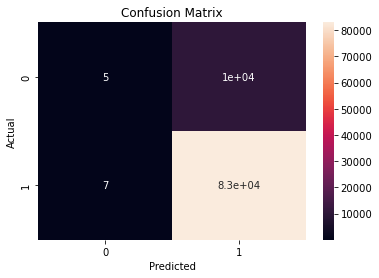

In [31]:

sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [15]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99980547, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20516776e-05, 2.65136907e-03, ...,
        9.99975897e-01, 9.99975897e-01, 1.00000000e+00]),
 array([1.98991522, 0.98991522, 0.98499311, ..., 0.46601983, 0.40827482,
        0.37009751]))

In [16]:
fpr,tpr,threshhold=roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

Text(0.5, 1.0, 'ROC curve')

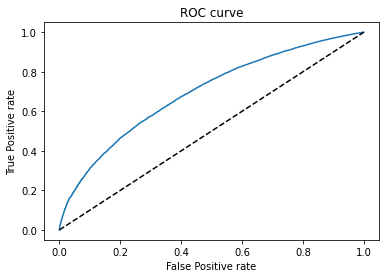

In [17]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')

In [20]:
area=roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])
print('Area under the curve is : ',area)
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.

Area under the curve is :  0.6939685536154461


# Gini and Kolmogorov- Simirnov

In [21]:
df_actual_predicted_probs=df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [23]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [24]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba
0,10375,1,0.370098
1,62024,1,0.394966
2,64698,0,0.408275
3,89769,0,0.455717
4,68930,1,0.466020


In [27]:
df_actual_predicted_probs['Cumulative N population']=df_actual_predicted_probs.index+1
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [31]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,Cumulative N population,Cumulative N Good,Cumulative N Bad,y_hat_test
0,10375,1,0.370098,1,1,0,0
1,62024,1,0.394966,2,2,0,0
2,64698,0,0.408275,3,2,1,0
3,89769,0,0.455717,4,2,2,0
4,68930,1,0.466020,5,3,2,0


In [35]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [37]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,Cumulative N population,Cumulative N Good,Cumulative N Bad,y_hat_test,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,10375,1,0.370098,1,1,0,0,0.000011,0.000012,0.000000
1,62024,1,0.394966,2,2,0,0,0.000021,0.000024,0.000000
2,64698,0,0.408275,3,2,1,0,0.000032,0.000024,0.000097
3,89769,0,0.455717,4,2,2,0,0.000043,0.000024,0.000195
4,68930,1,0.466020,5,3,2,0,0.000054,0.000036,0.000195


Gini

Text(0.5, 1.0, 'Gini')

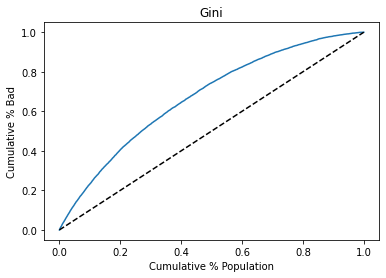

In [38]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Population'],linestyle='--',color='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [39]:
#relation between area under roc curve and gini
gini=2*area - 1
print('Gini is : ',gini)

Gini is :  0.38793710723089214


Kolmogorov-Smirnov 

Text(0.5, 1.0, 'Kolmogorov- Smirnov')

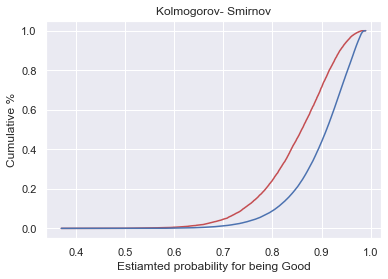

In [41]:
sns.set()
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Good'], color='b')
plt.ylabel('Cumulative %')
plt.xlabel('Estiamted probability for being Good')
plt.title('Kolmogorov- Smirnov')

In [42]:
ks=max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
print('Difference between bad and good is : ',ks)

Difference between bad and good is :  0.27742954786916496


The two cumulative distribution function are sufficiently far away from each other and the model has satisfactory predictive power.